In [4]:
%matplotlib notebook

In [5]:
# Dependencies
import openweathermapy.core as owm
# Dependencies
import requests
import random
#from config import api_key
from config import gkey
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [6]:
Jan = pd.read_csv("RideShare_Data_201801.csv", parse_dates=[0], low_memory=False)
Feb = pd.read_csv("RideShare_Data_201802.csv", parse_dates=[0], low_memory=False)
Mar = pd.read_csv("RideShare_Data_201803.csv", parse_dates=[0], low_memory=False)
Apr = pd.read_csv("RideShare_Data_201804.csv", parse_dates=[0], low_memory=False)
May = pd.read_csv("RideShare_Data_201805.csv", parse_dates=[0], low_memory=False)
Jun = pd.read_csv("RideShare_Data_201806.csv", parse_dates=[0], low_memory=False)
Jul = pd.read_csv("RideShare_Data_201807.csv", parse_dates=[0], low_memory=False)
Aug = pd.read_csv("RideShare_Data_201808.csv", parse_dates=[0], low_memory=False)
Sep = pd.read_csv("RideShare_Data_201809.csv", parse_dates=[0], low_memory=False)
Oct = pd.read_csv("RideShare_Data_201810.csv", parse_dates=[0], low_memory=False)
Nov = pd.read_csv("RideShare_Data_201811.csv", parse_dates=[0], low_memory=False)
Dec = pd.read_csv("RideShare_Data_201812.csv", parse_dates=[0], low_memory=False)
Yearly_Data = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec])



In [7]:
Yearly_Data.head()

,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,wind_speed,weather_id,weather_main,weather_description
0,2018-01-01 22:22:03,2018-01-01 22:44:48,205.0,63.0,1.0,"Saint Albans, Queens","Cypress Hills, Brooklyn",11366,11216,22.750000,17,34,3,800,Clear,sky is clear
1,2018-01-01 12:44:06,2018-01-01 13:12:08,125.0,93.0,0.0,"Hudson Sq, Manhattan","Flushing Meadows-Corona Park, Queens",10024,11366,28.033333,6,60,2,800,Clear,sky is clear
2,2018-01-01 00:28:16,2018-01-01 00:41:23,39.0,71.0,1.0,"Canarsie, Brooklyn","East Flatbush/Farragut, Brooklyn",11216,11216,13.116667,11,43,4,800,Clear,sky is clear
3,2018-01-01 02:42:55,2018-01-01 02:56:46,100.0,137.0,0.0,"Garment District, Manhattan","Kips Bay, Manhattan",10024,10024,13.850000,9,46,5,800,Clear,sky is clear
4,2018-01-01 14:15:46,2018-01-01 14:37:55,55.0,115.0,0.0,"Coney Island, Brooklyn","Grymes Hill/Clifton, Staten Island",11216,10306,22.150000,8,60,2,800,Clear,sky is clear


In [33]:
 
zip_grp_cnt = Yearly_Data.groupby(['Pickup_ZipCode']).size().reset_index(name='count')
zipcnt_sort = zip_grp_cnt.sort_values("count", ascending = False)
Top_10_zip = zipcnt_sort.head(10)
zip_top10 = Top_10_zip["Pickup_ZipCode"].tolist()
zip_top10

[10024, 11216, 11366, 10462, 10036, 10001, 10003, 10007, 11371, 10451]

In [34]:
year_data_zip = Yearly_Data[Yearly_Data['Pickup_ZipCode'].isin(zip_top10) ]
year_data_zip

,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,wind_speed,weather_id,weather_main,weather_description
0,2018-01-01 22:22:03,2018-01-01 22:44:48,205.0,63.0,1.0,"Saint Albans, Queens","Cypress Hills, Brooklyn",11366,11216,22.750000,17,34,3,800,Clear,sky is clear
1,2018-01-01 12:44:06,2018-01-01 13:12:08,125.0,93.0,0.0,"Hudson Sq, Manhattan","Flushing Meadows-Corona Park, Queens",10024,11366,28.033333,6,60,2,800,Clear,sky is clear
2,2018-01-01 00:28:16,2018-01-01 00:41:23,39.0,71.0,1.0,"Canarsie, Brooklyn","East Flatbush/Farragut, Brooklyn",11216,11216,13.116667,11,43,4,800,Clear,sky is clear
3,2018-01-01 02:42:55,2018-01-01 02:56:46,100.0,137.0,0.0,"Garment District, Manhattan","Kips Bay, Manhattan",10024,10024,13.850000,9,46,5,800,Clear,sky is clear
4,2018-01-01 14:15:46,2018-01-01 14:37:55,55.0,115.0,0.0,"Coney Island, Brooklyn","Grymes Hill/Clifton, Staten Island",11216,10306,22.150000,8,60,2,800,Clear,sky is clear
5,2018-01-01 04:44:39,2018-01-01 05:01:29,7.0,244.0,0.0,"Astoria, Queens","Washington Heights South, Manhattan",11366,10024,16.833333,8,55,4,800,Clear,sky is clear
7,2018-01-01 03:46:04,2018-01-01 03:51:51,246.0,68.0,0.0,"West Chelsea/Hudson Yards, Manhattan","East Chelsea, Manhattan",10001,10024,5.783333,9,51,5,800,Clear,sky is clear
8,2018-01-01 05:34:02,2018-01-01 05:39:42,130.0,215.0,0.0,"Jamaica, Queens","South Jamaica, Queens",11366,11366,5.666667,8,55,4,800,Clear,sky is clear
9,2018-01-01 13:59:46,2018-01-01 14:09:11,49.0,65.0,0.0,"Clinton Hill, Brooklyn","Downtown Brooklyn/MetroTech, Brooklyn",11216,11201,9.416667,8,60,2,800,Clear,sky is clear
11,2018-01-01 23:40:57,2018-01-01 23:46:44,37.0,36.0,0.0,"Bushwick South, Brooklyn","Bushwick North, Brooklyn",11216,11216,5.783333,14,37,1,800,Clear,sky is clear


<IPython.core.display.Javascript object>


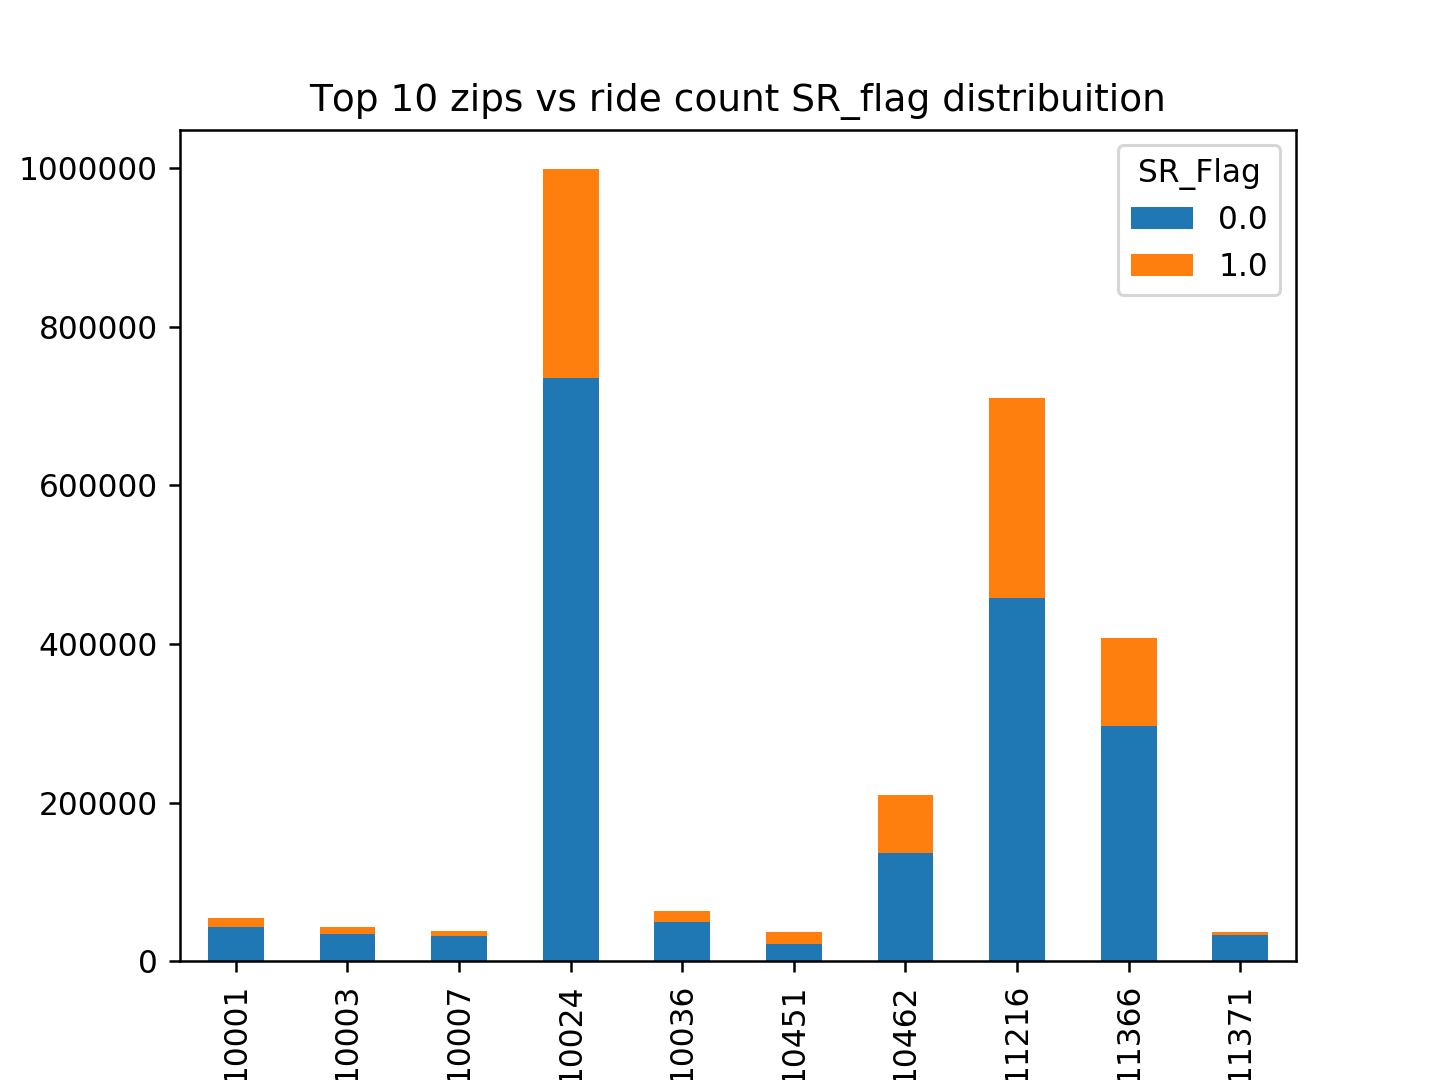

In [43]:

year_data_zip.groupby(['Pickup_ZipCode','SR_Flag']).size().unstack().plot(kind='bar',stacked=True)

In [44]:
plt.title("Top 10 zips vs ride count SR_flag distribuition")
plt.xlabel("Zips")
plt.ylabel("Ride count")

Text(6.5, 0.5, 'Ride count')

<IPython.core.display.Javascript object>


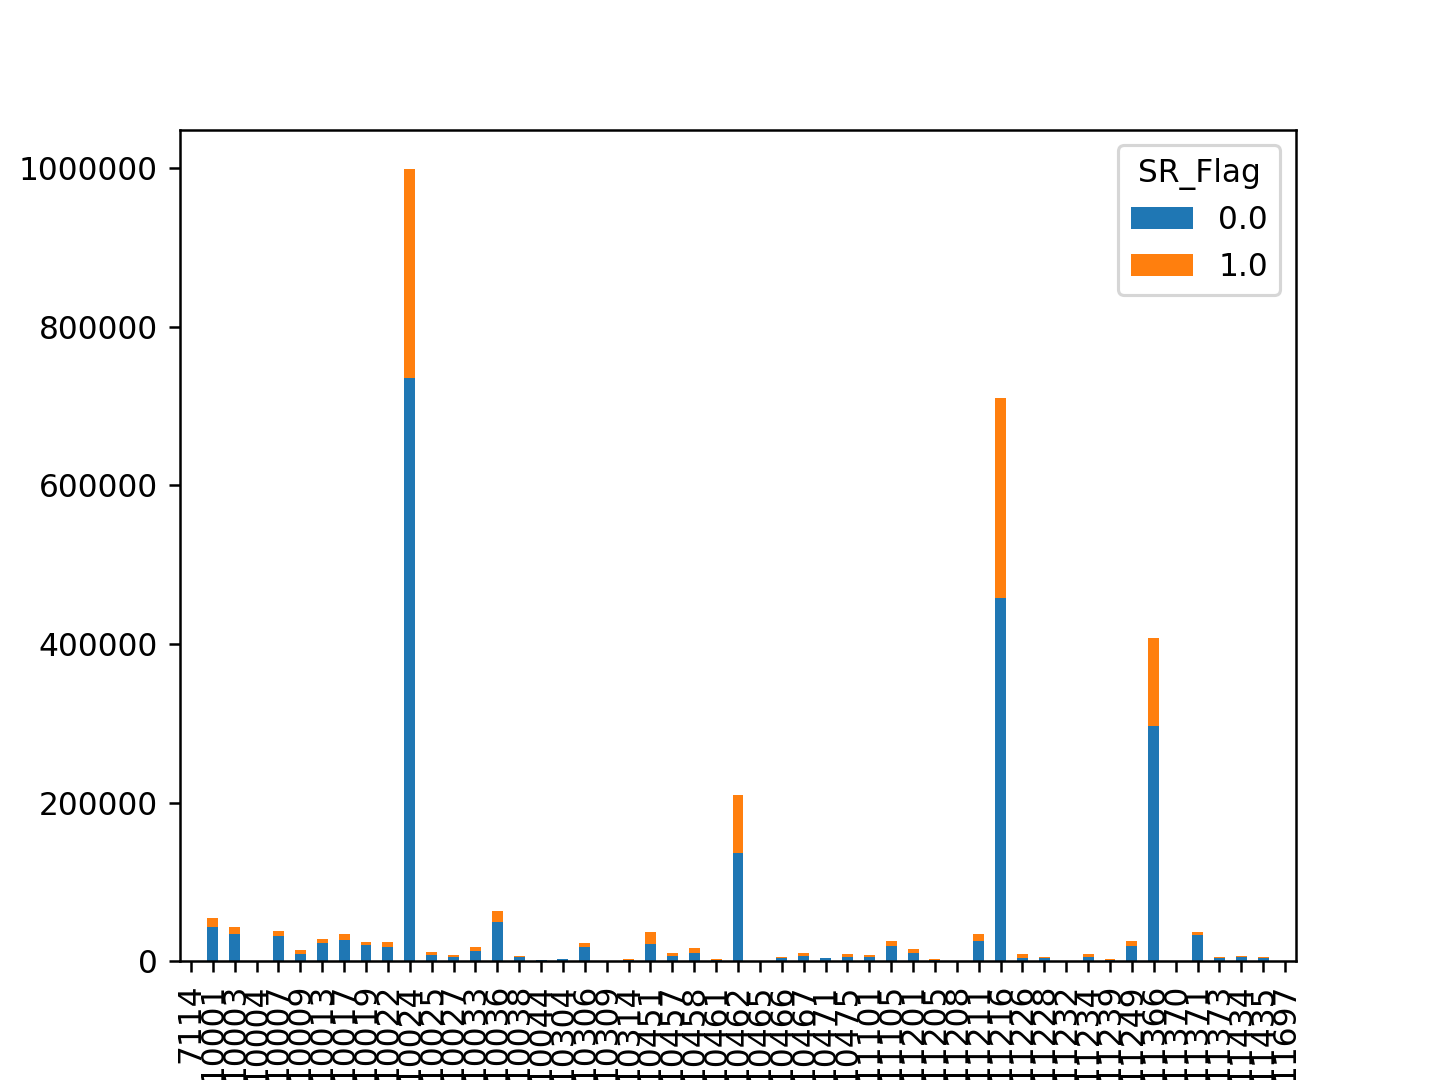

In [20]:
Yearly_Data.groupby(['Pickup_ZipCode','SR_Flag']).size().unstack().plot(kind='bar',stacked=True)

In [38]:
plt.title("All zips vs ride count SR_flag distribuition")
plt.xlabel("Zips")
plt.ylabel("Ride count")

Text(6.5, 0.5, 'Ride count')